In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import patchworklib as pw
import omicverse as ov
import scanpy as sc

import logging
import rpy2.rinterface_lib.callbacks as rcb
from patsy.user_util import balanced
from rpy2.robjects import r, pandas2ri, default_converter
from rpy2.robjects.conversion import localconverter
import anndata2ri

# R语言运行设置
anndata2ri.activate()
rcb.logger.setLevel(logging.ERROR)
local_converter = localconverter(default_converter + pandas2ri.converter + anndata2ri.converter)
%load_ext rpy2.ipython

# pandas设置
pd.set_option("display.unicode.east_asian_width", True)    # 输出列名对齐
pd.set_option("display.max_columns", None)                 # 修改最大列数，防止列显示不全
pd.set_option('display.expand_frame_repr', False)          # 设置不折叠数据

# 配置绘图设置
ov.plot_set(verbosity=0, dpi=80, scanpy=True, color_map='viridis', figsize=None, font_path='Arial')
mpl.rcParams['font.sans-serif'] += ['SimHei']               # 设置中文字体
mpl.rcParams['axes.unicode_minus'] = False                  # 正常显示负号

# 其它设置
ov.settings.mode='cpu'

Error importing in API mode: ImportError('On Windows, cffi mode "ANY" is only "ABI".')
Trying to import in ABI mode.


🔬 Starting plot initialization...
Arial font downloaded successfully to: C:\Users\Harrison\AppData\Local\Temp\omicverse_arial.ttf
Registered as: Arial
🧬 Detecting GPU devices…
✅ NVIDIA CUDA GPUs detected: 1
    • [CUDA 0] NVIDIA GeForce RTX 5060 Laptop GPU
      Memory: 8.0 GB | Compute: 12.0

   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

🔖 Version: 1.7.8   📚 Tutorials: https://omicverse.readthedocs.io/
✅ plot_set complete.



<Figure size 100x100 with 0 Axes>

In [2]:
adata = sc.read_10x_mtx(path="./data/filtered_gene_bc_matrices/hg19")

sc.pp.filter_genes(adata, min_cells=3)
sc.pp.filter_cells(adata, min_genes=200)

adata.obs_names_make_unique()
adata.var_names_make_unique()

adata.var["mt"] = adata.var_names.str.startswith("MT-")
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
adata.var["hb"] = adata.var_names.str.contains(("^HB[^(P)]"))
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt", "ribo", "hb"], inplace=True)

adata

AnnData object with n_obs × n_vars = 2700 × 13714
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'gene_ids', 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

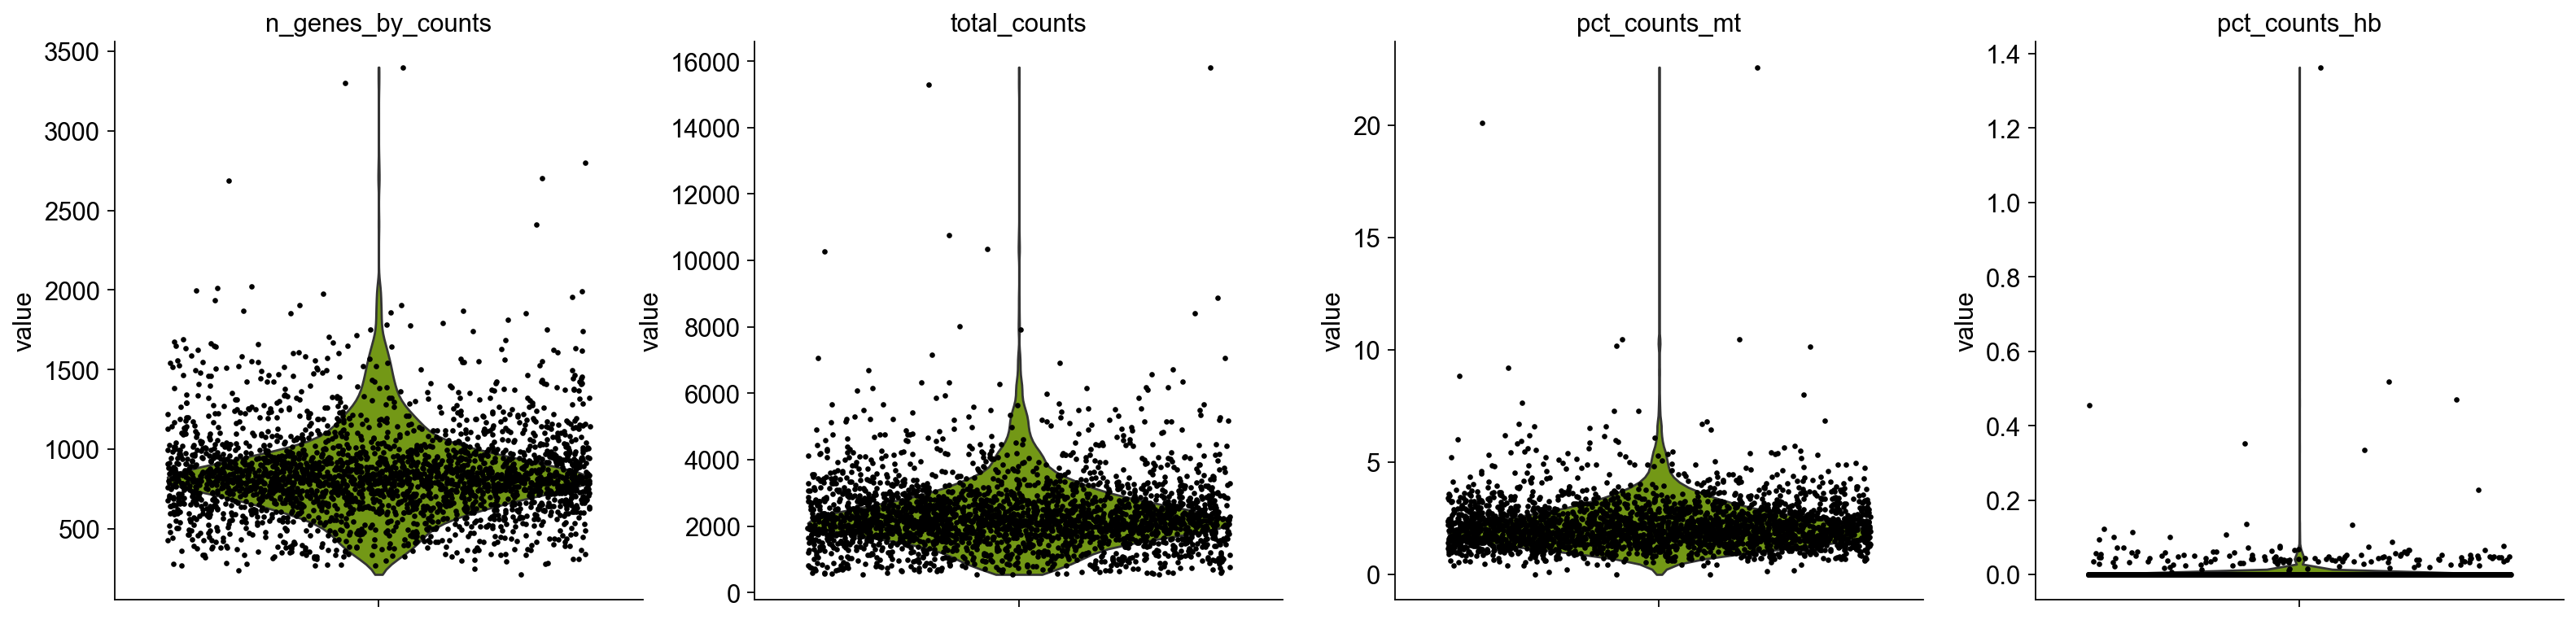

In [3]:
sc.pl.violin(adata,
             keys=['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_hb'],
             color="#7cae0099",
             multi_panel=True,
             size=3,
             jitter=0.4
             )

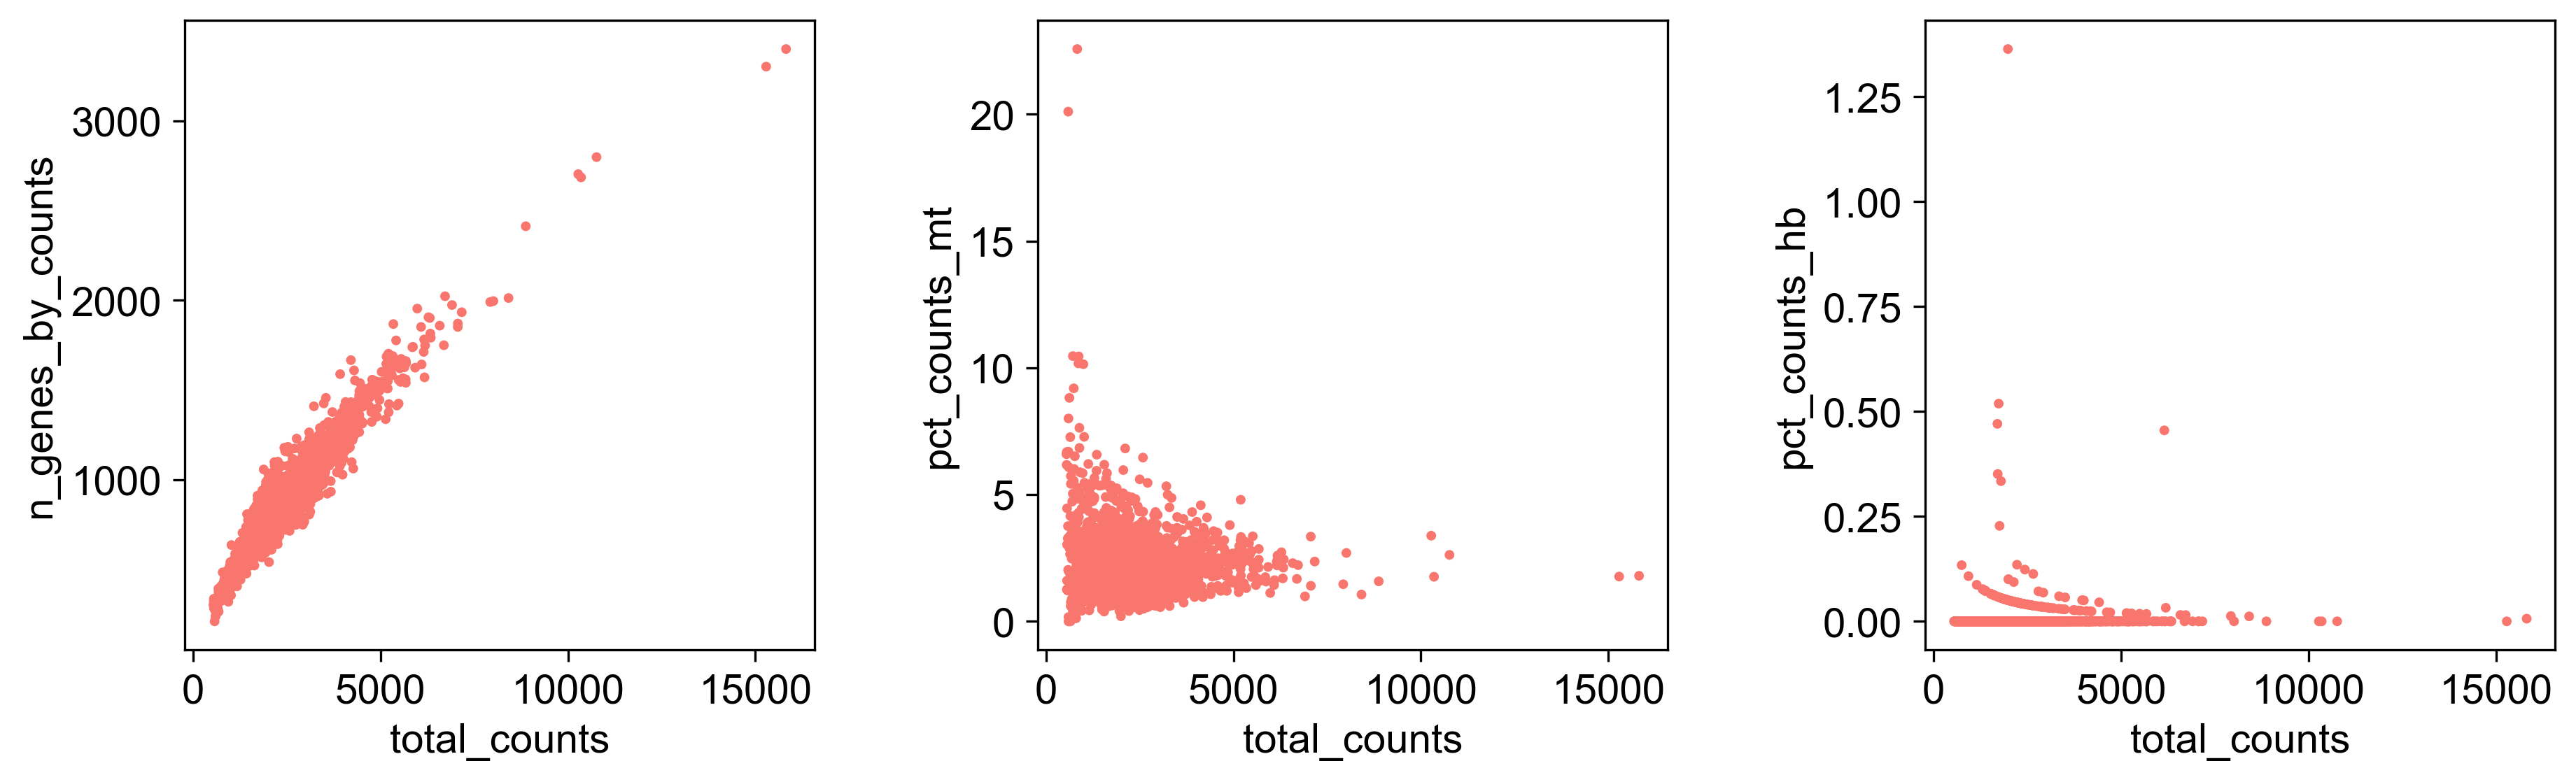

In [4]:
ax1 = pw.Brick(figsize=(3, 3))
ax2 = pw.Brick(figsize=(3, 3))
ax3 = pw.Brick(figsize=(3, 3))
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts', color='#F8766D', ax=ax1)
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt', color='#F8766D', ax=ax2)
sc.pl.scatter(adata, x='total_counts', y='pct_counts_hb', color='#F8766D', ax=ax3)
ax1 | ax2 | ax3

In [5]:
sc.pp.filter_cells(adata, min_genes=201)
sc.pp.filter_cells(adata, max_genes=5999)
adata = adata[(adata.obs['pct_counts_mt'] < 10) & (adata.obs['pct_counts_hb'] < 2)]
adata

View of AnnData object with n_obs × n_vars = 2694 × 13714
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'gene_ids', 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

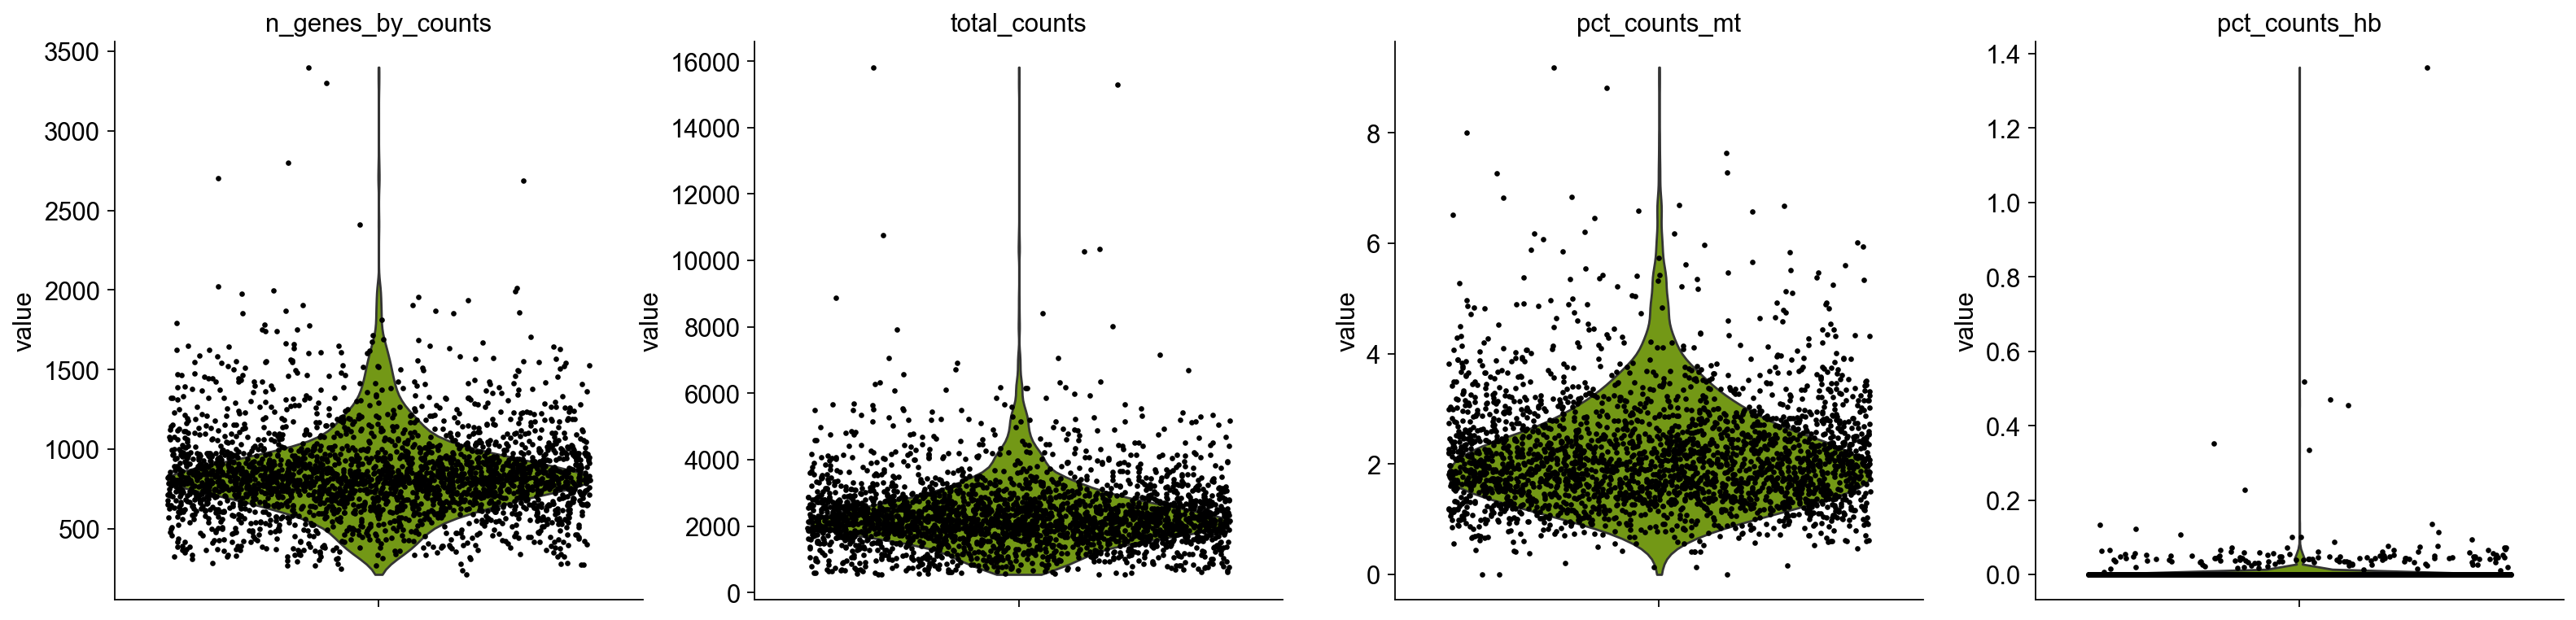

In [6]:
sc.pl.violin(adata,
             keys=['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_hb'],
             color="#7cae0099",
             multi_panel=True,
             size=3,
             jitter=0.4
             )

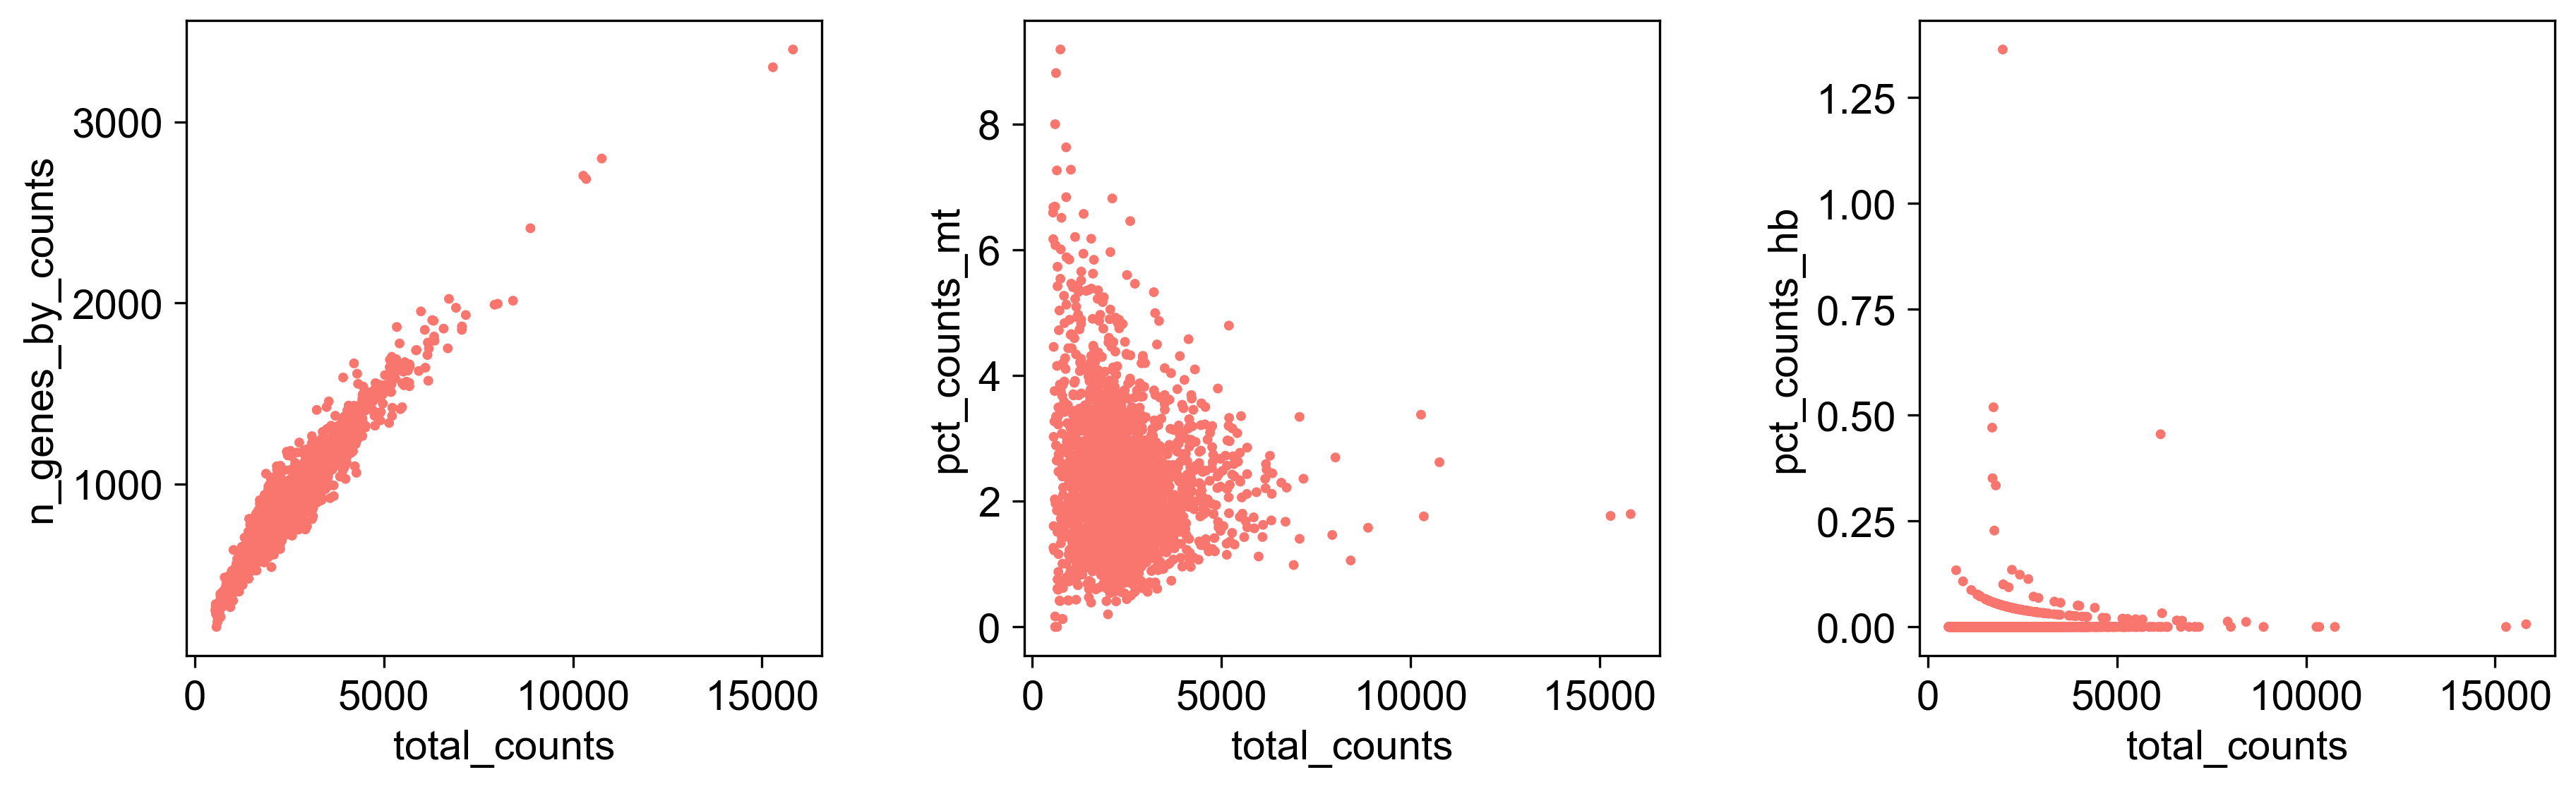

In [7]:
ax1 = pw.Brick(figsize=(3, 3))
ax2 = pw.Brick(figsize=(3, 3))
ax3 = pw.Brick(figsize=(3, 3))
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts', color='#F8766D', ax=ax1)
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt', color='#F8766D', ax=ax2)
sc.pl.scatter(adata, x='total_counts', y='pct_counts_hb', color='#F8766D', ax=ax3)
ax1 | ax2 | ax3

In [8]:
adata.layers['logNorm'] = adata.X.copy()
sc.pp.normalize_total(adata,
                      layer='logNorm',
                      target_sum=10000
                      )
sc.pp.log1p(adata, layer='logNorm')

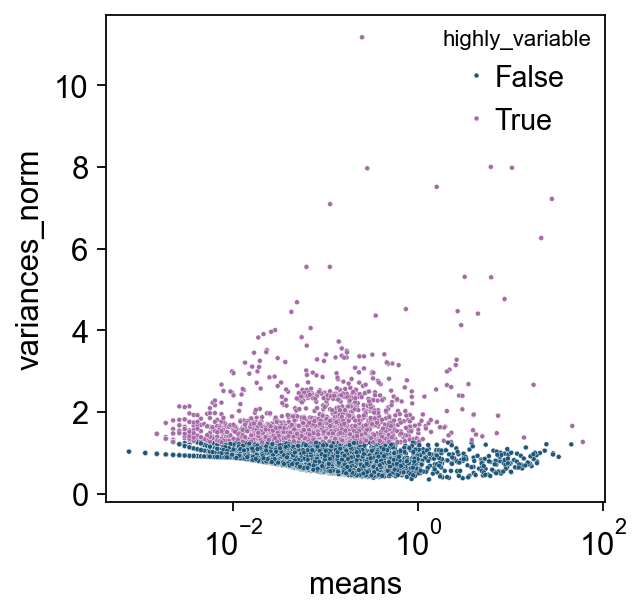

In [9]:
sc.pp.highly_variable_genes(adata,
                            flavor="seurat_v3",
                            n_top_genes=2000
                            )
ax = sns.scatterplot(data=adata.var, x="means", y="variances_norm", hue="highly_variable", s=5)
ax.set_xscale('log', base=10)
plt.show()

In [17]:
# 表达量变变化最高的10个基因
adata.var.sort_values(by='variances_norm', ascending=False, inplace=False).index[0:9].values

array(['PPBP', 'S100A9', 'LYZ', 'IGLL5', 'GNLY', 'FTL', 'PF4', 'FTH1',
       'GNG11'], dtype=object)

In [18]:
adata.layers['regressed'] = adata.layers['logNorm'].copy()
sc.pp.regress_out(adata,
                  layer="regressed",
                  keys='pct_counts_mt'
                  )
adata.layers['scaled'] = adata.layers['regressed'].copy()
sc.pp.scale(adata,
            layer="scaled",
            max_value=10
            )

In [19]:
sc.pp.pca(adata,
          layer='scaled',
          mask_var="highly_variable",
          n_comps=50,
          zero_center=False
          )

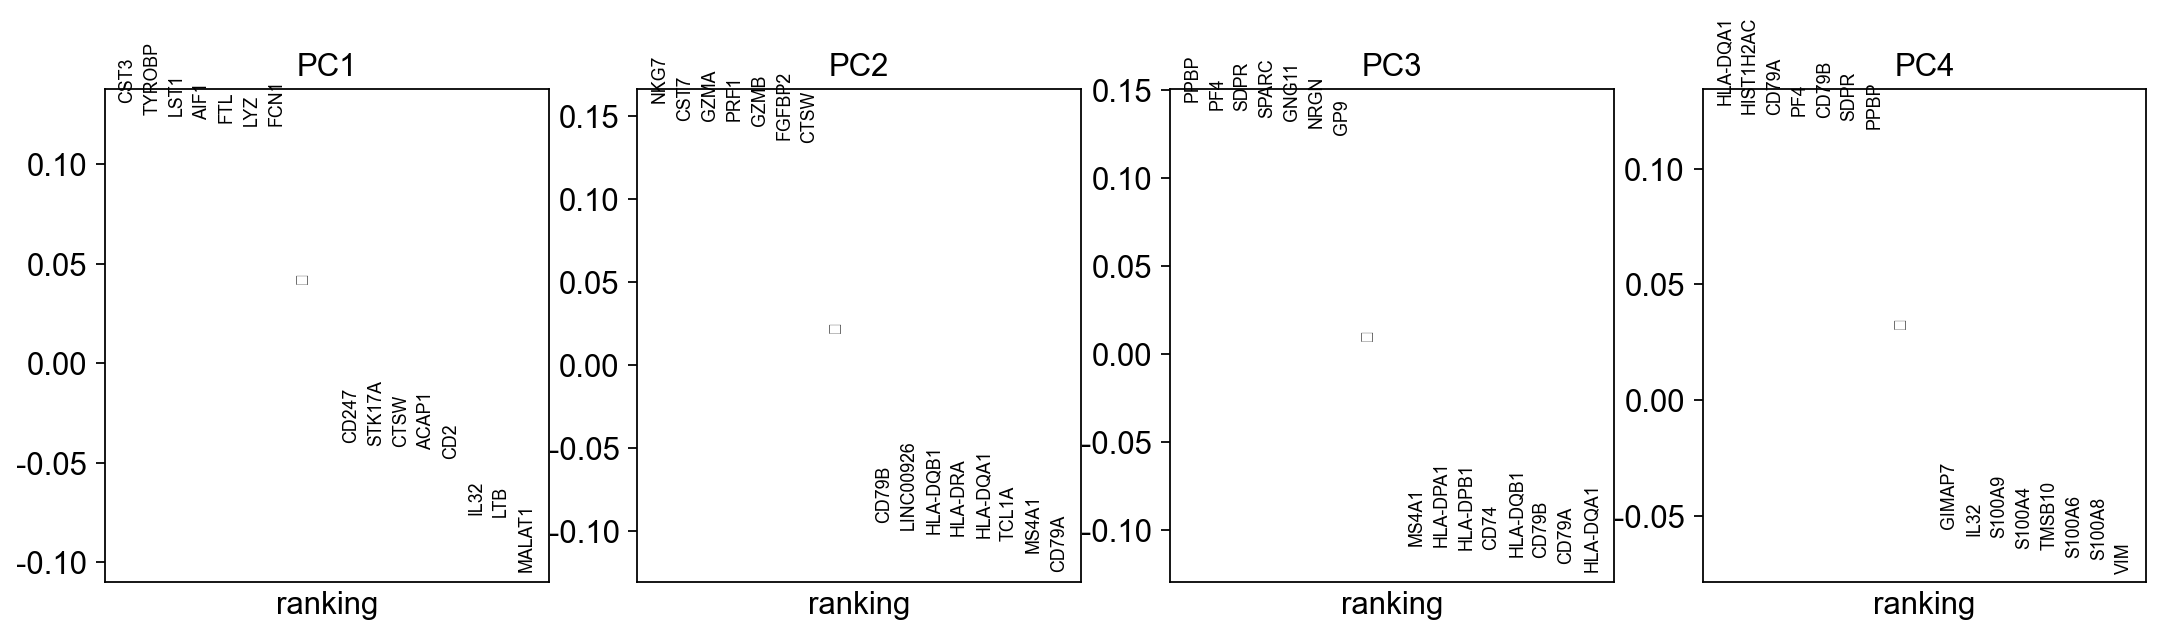

In [20]:
sc.pl.pca_loadings(adata, components=[1, 2, 3, 4], include_lowest=True, n_points=15)

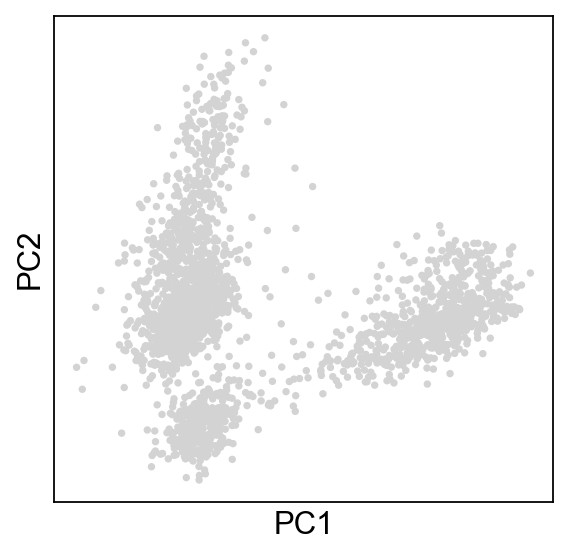

In [21]:
sc.pl.pca(adata, frameon=True, show=True)

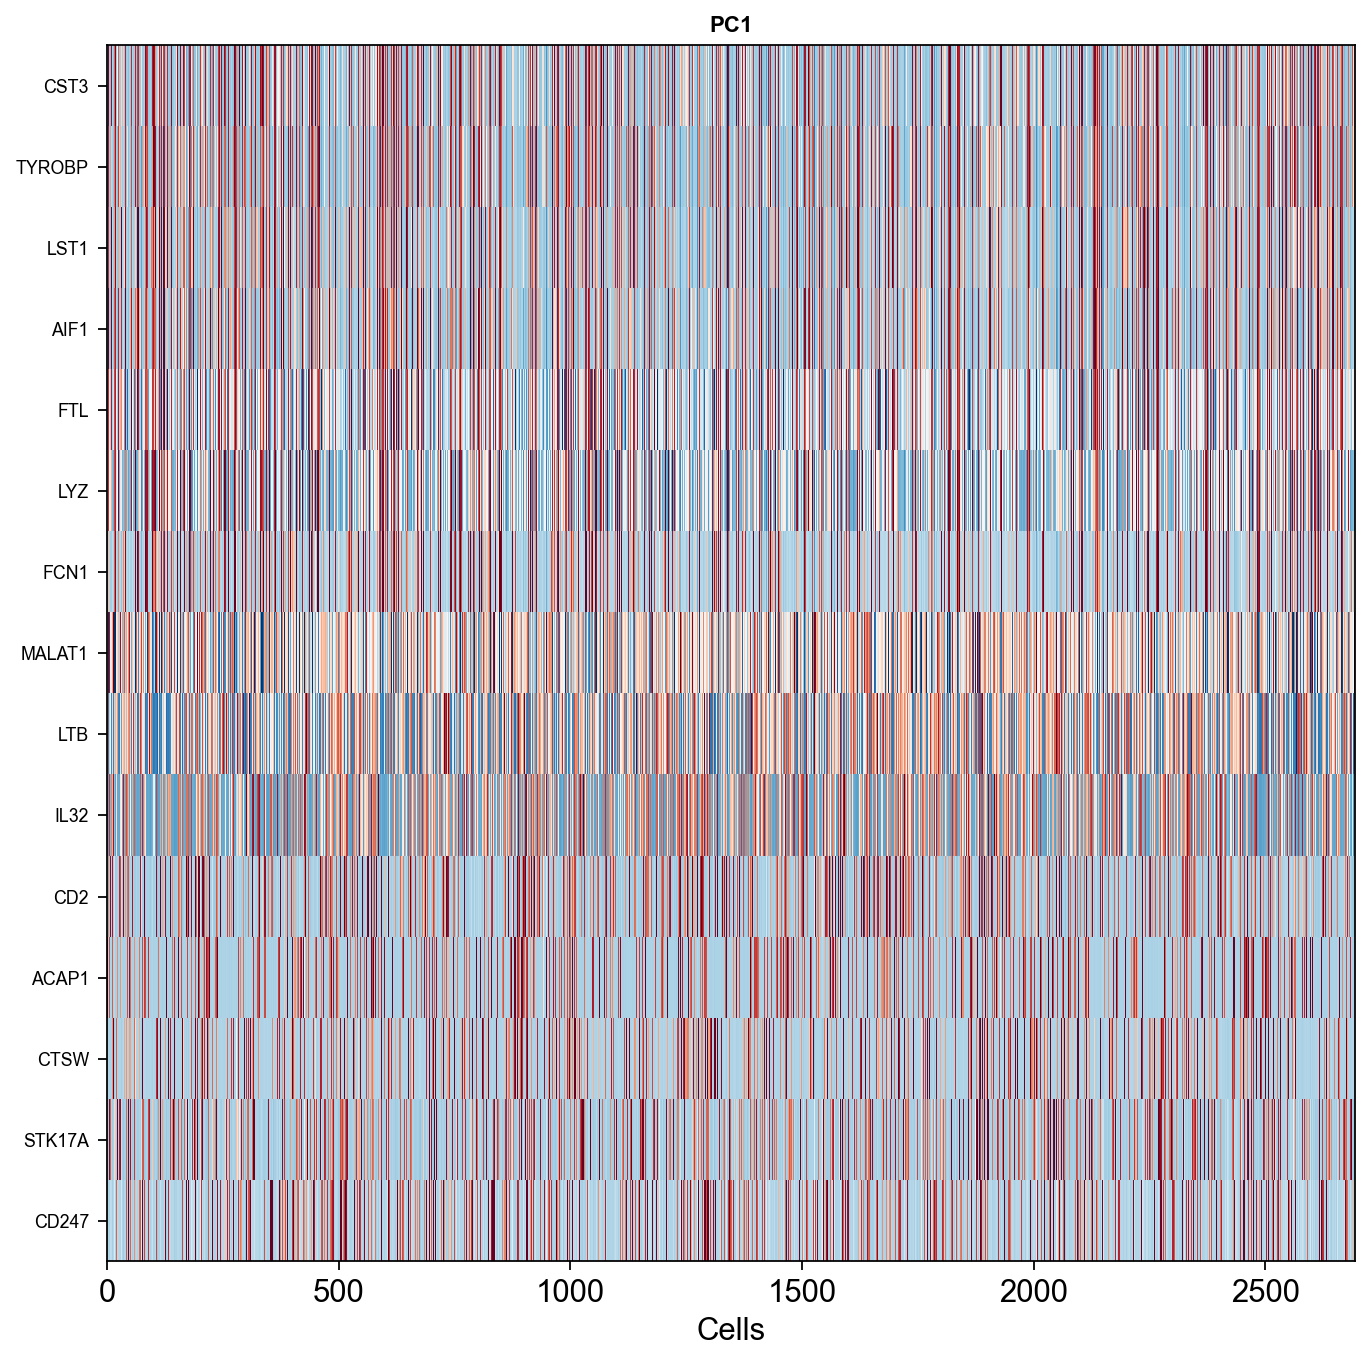

In [76]:
nPC = 1
n_genes = 15
n_cells = adata.n_obs
balanced = True

gene_loadings = adata.varm['PCs']
pc_loadings = gene_loadings[:, nPC-1]

if n_cells < adata.n_obs:
    np.random.seed(42)
    cell_indices = np.random.choice(adata.n_obs, n_cells, replace=False)
    adata_subset = adata[cell_indices].copy()
else:
    adata_subset = adata.copy()

if balanced:
    # 平衡选择：一半正载荷，一半负载荷
    n_pos = n_genes // 2
    n_neg = n_genes - n_pos

    # 正载荷最高的基因
    pos_indices = np.argsort(pc_loadings)[-n_pos:][::-1]

    # 负载荷最高的基因
    neg_indices = np.argsort(pc_loadings)[:n_neg]

    # 合并
    selected_indices = np.concatenate([pos_indices, neg_indices])
else:
    # 只选绝对值最大的基因
    abs_loadings = np.abs(pc_loadings)
    selected_indices = np.argsort(abs_loadings)[-n_genes:][::-1]
selected_genes = adata.var_names[selected_indices]

# 标准化：按基因（行）标准化
expr_matrix = adata_subset[:, selected_genes].layers['scaled'].toarray()


# 按基因载荷排序
# gene_order = np.argsort(pc_loadings[selected_indices])[::-1]
# expr_zscore_sorted = expr_zscore[:, selected_indices]

# 绘制热图
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
im = ax.imshow(expr_matrix.T, aspect='auto', cmap='RdBu_r', vmin=-2, vmax=2, interpolation='nearest')

# 设置坐标轴
ax.set_title(f'PC{nPC}', fontsize=10, fontweight='bold')
ax.set_xlabel('Cells')
ax.set_yticks(range(len(selected_genes)))
ax.set_yticklabels(selected_genes, fontsize=8)

plt.show()

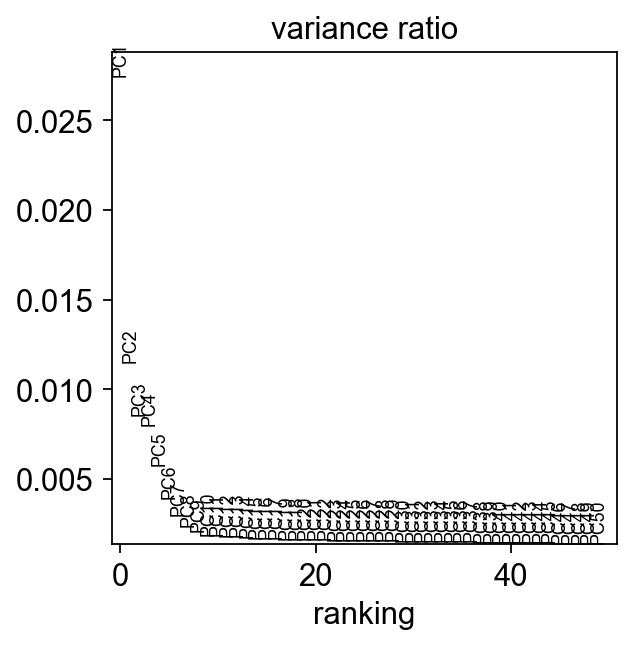

8

In [22]:
sc.pl.pca_variance_ratio(adata, n_pcs=50, log=False)
# 拐点检测
from kneed import KneeLocator
x = range(1, len(adata.uns['pca']['variance_ratio'])+1)
y = adata.uns['pca']['variance_ratio']
kneedle = KneeLocator(x, y, curve='convex', direction='decreasing')
kneedle.elbow

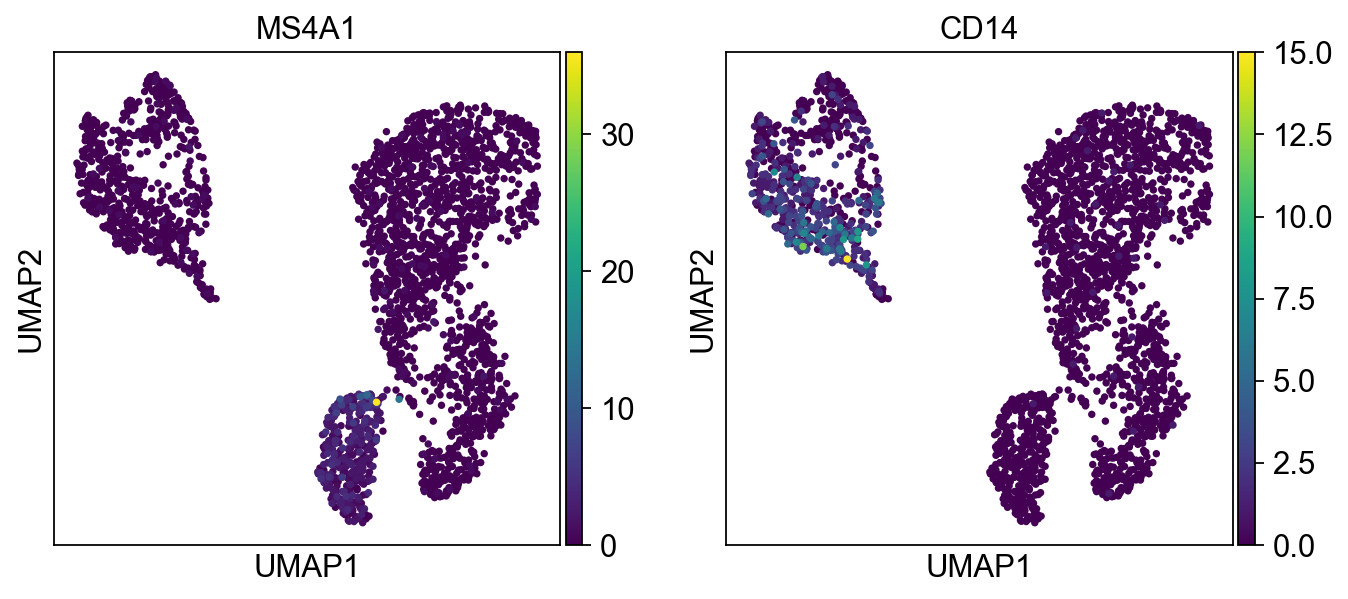

In [25]:
sc.pp.neighbors(adata,
                n_neighbors=30,
                n_pcs=10,
                use_rep='X_pca',
                metric='euclidean'
                )
sc.tl.umap(adata,
           n_components=2,
           neighbors_key="neighbors",
           min_dist=0.3,
           spread=1
           )
sc.pl.umap(adata, color=["MS4A1", "CD14"], frameon=True, show=True)

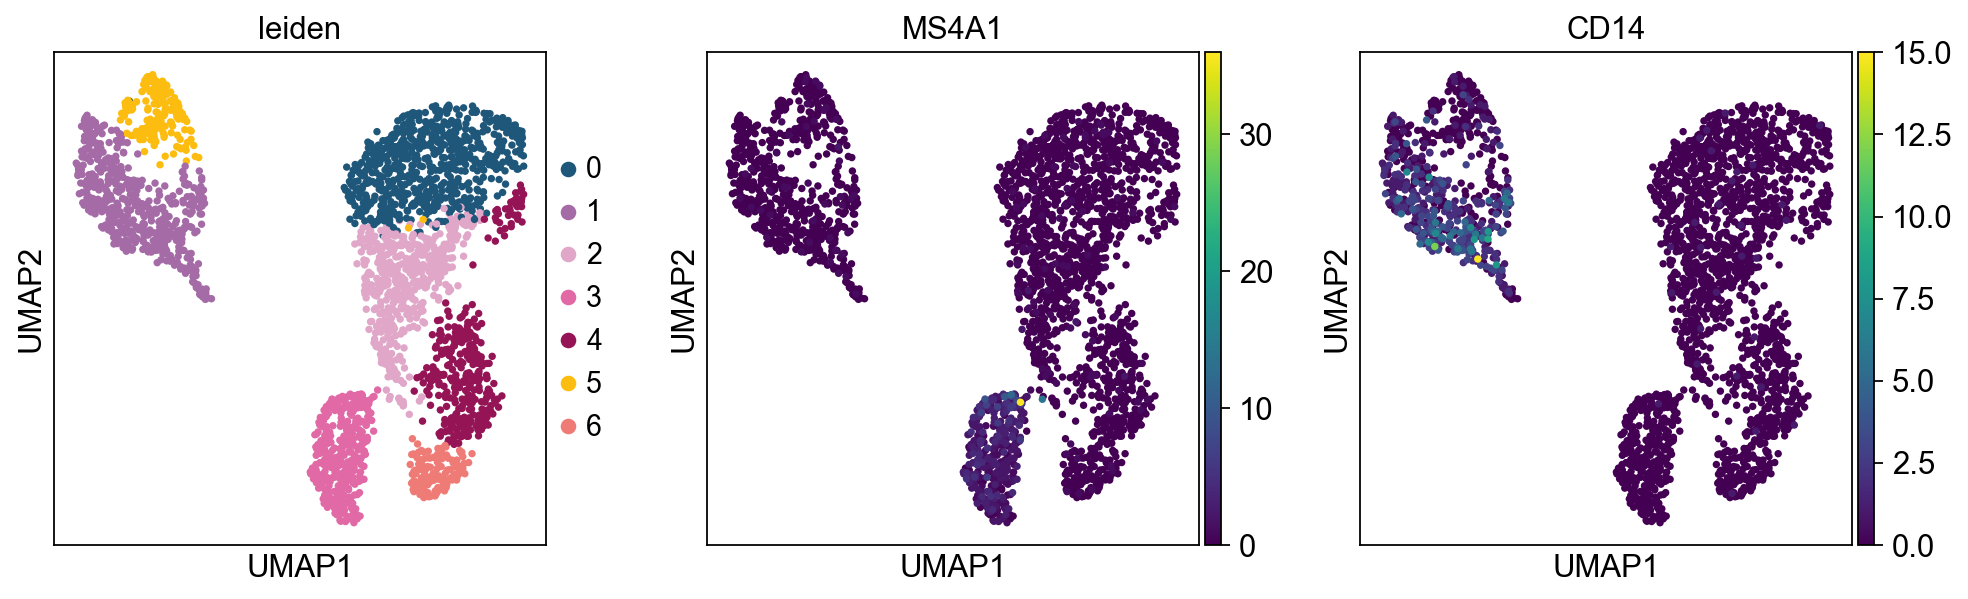

In [28]:
sc.tl.leiden(adata, resolution=0.5)
sc.pl.umap(adata, color=["leiden", "MS4A1", "CD14"], frameon=True, show=True)